<a href="https://colab.research.google.com/github/rainmaker29/Tensorflow-Lite/blob/master/TFLITE_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  import tensorflow as tf

  import pathlib
  import numpy as np
  import matplotlib.pyplot as plt

  from tensorflow.keras.models import Model
  from tensorflow.keras.layers import Input

In [2]:
x = [-1,0,1,2,3,4]
y= [-3,-1,1,3,5,7]

model = tf.keras.models.Sequential([

tf.keras.layers.Dense(units=1,input_shape=[1])                                    

]
)

model.compile(loss='mean_squared_error',optimizer='sgd')

model.fit(x,y,epochs=200,verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 5.1027
Epoch 2/200
1/1 [==============================] - 0s 998us/step - loss: 4.1901
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 3.4685
Epoch 4/200
1/1 [==============================] - 0s 879us/step - loss: 2.8973
Epoch 5/200
1/1 [==============================] - 0s 866us/step - loss: 2.4444
Epoch 6/200
1/1 [==============================] - 0s 890us/step - loss: 2.0847
Epoch 7/200
1/1 [==============================] - 0s 873us/step - loss: 1.7984
Epoch 8/200
1/1 [==============================] - 0s 982us/step - loss: 1.5699
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 1.3870
Epoch 10/200
1/1 [==============================] - 0s 882us/step - loss: 1.2399
Epoch 11/200
1/1 [==============================] - 0s 928us/step - loss: 1.1212
Epoch 12/200
1/1 [==============================] - 0s 967us/step - loss: 1.0247
Epoch 13/200
1/1 [=========================

In [3]:
export_dir = 'saved_model/1'
tf.saved_model.save(model,export_dir=export_dir)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


In [0]:
#Converting to tflite model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()


In [5]:
#Writing the converted model to file
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

640

In [0]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

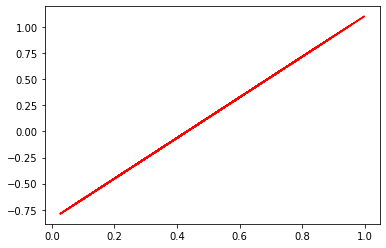

In [8]:
plt.plot(inputs, outputs, 'r')
plt.show()

In [0]:
#Download the model
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass